Example of solving linearly coupled differential equations
This will demonstate eigenvectors, dsolve for 2nd order differential equation, and solve for a system of equations.

In [53]:
import numpy as np
from sympy import *

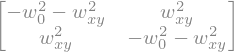

In [54]:
#oscillation symbols
w0,wxy = symbols('w_0,w_{xy}', real=True, positive=True)

#setup coupling matrix
M = Matrix([ [-(w0**2+wxy**2), wxy**2],[wxy**2, -(w0**2+wxy**2)] ])
M

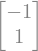

In [55]:
#obtain the eigenvalues and eigenvectors to diagonalize M
Mvecs = M.eigenvects()

#the indexing is a little complicated for eigenvects
#first index corresponds to which eigenvalues
#second index cooresponds to 0 eigenvalue, 1 multiplicity of eigenvalue, 2 eigenvector
#third index corresponds to which eigenvector
#in this example, there are two eigenvalues, each unique, each with only one eigenvector.
e1 = Mvecs[0][0]
e2 = Mvecs[1][0]
v1 = Mvecs[0][2][0]
v2 = Mvecs[1][2][0]
v1
v2

In [56]:
#our decoupled variables we will call u and v
#the eigenvalues tell us which values go in the differential equations for u and v
u = Function('u')
v = Function('v')
t = symbols('t', real=True)
eq1 = Eq(u(t).diff(t,t) - e1*u(t),0)
eq2 = Eq(v(t).diff(t,t) - e2*v(t),0)
#we are now ready to solve the second-order differential equations
u_r = dsolve(eq1, u(t)).simplify().rhs
v_r = dsolve(eq2, v(t)).simplify().rhs
u_r

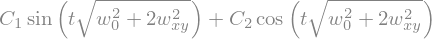

In [57]:
v_r

In [58]:
#the eigenvectors tell us how u and v relate to x and y
x,y = symbols('x y', real=True)
w = Matrix([x, y]).T
u_l = (w*v1)[0]
v_l = (w*v2)[0]
print(u_l)
print(v_l)

x + y
-x + y


{x: C1*sin(t*w_0)/2 - C1*sin(t*sqrt(w_0**2 + 2*w_{xy}**2))/2 + C2*cos(t*w_0)/2 - C2*cos(t*sqrt(w_0**2 + 2*w_{xy}**2))/2, y: C1*sin(t*w_0)/2 + C1*sin(t*sqrt(w_0**2 + 2*w_{xy}**2))/2 + C2*cos(t*w_0)/2 + C2*cos(t*sqrt(w_0**2 + 2*w_{xy}**2))/2}
The solution for x is:


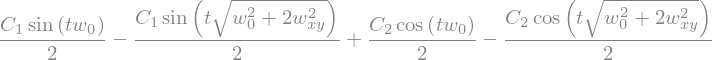

In [59]:
#now we can express the solution to the differential equation in terms of x and y
sol_eq1 = Eq(u_l,u_r)
sol_eq2 = Eq(v_l,v_r)
#we can now use solve to get x and y on their own
sol_xy = solve((sol_eq1,sol_eq2),(x,y))
print(sol_xy)
sol_x = sol_xy[x]
sol_y = sol_xy[y]
print('The solution for x is:')
sol_x

The solution for y is:


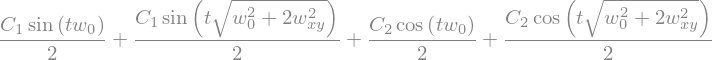

In [60]:
print('The solution for y is:')
sol_y

2*v_{y0}/(w_0 + sqrt(w_0**2 + 2*w_{xy}**2))
The solution for x is:


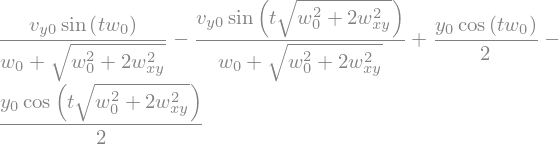

In [61]:
#the coefficients C1 and C2 can also be expressed in terms of initial conditions y0 and vy0
#it is necesaary to declare C1 and C2 in order to make substitutions
C1, C2 = symbols('C1,C2')
y0, vy0 = symbols('y_0,v_{y0}')
#we see that the y solution has a nontrivial value at t=0
sol_x.subs(t,0)
sol_y.subs(t,0)
#we can now replace C2 with y0
sol_x = sol_x.subs(C2,y0)
sol_y = sol_y.subs(C2,y0)
#now we see that dy/dt has C1 in it.
sol_y.diff(t).subs(t,0)
#set this expression equal to vy0, and solve for C1
c1temp = solve(Eq(sol_y.diff(t).subs(t,0),vy0),C1)[0]
print(c1temp)
#finally we substitute our expression for C1 back in.
sol_x = sol_x.subs(C1,c1temp)
sol_y = sol_y.subs(C1,c1temp)
print('The solution for x is:')
sol_x

The solution for y is:


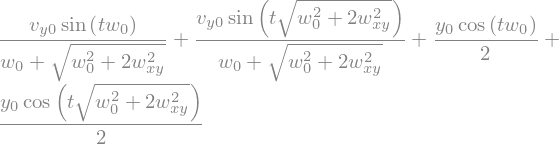

In [62]:
print('The solution for y is:')
sol_y
#taking the extra step to use y0 and vy0 leaves a more complicated expression, but its more usable.

One last comment, you may know that solving a linear system of equations is equivalent to diagnolizing a matrix.
So that means that we could have used the diagonalize method twice or the solve method twice, instead of one each